## Laborator 4 Versiune Imbunatatita

## Obiective

* familiaziraze cu tensorflow slim.
* modificarea unei retele neurale in slim
* vizualizare date input
* vizualizare activari
* tf.metrics


## Pasul 0. Upload dependinte Python#

* cifar10.py
* download.py
* dataset.py
* cache.py


In [0]:

from google.colab import files
uploaded = files.upload()
print("OK")

Saving cache.py to cache.py
Saving cifar10.py to cifar10.py
Saving dataset.py to dataset.py
Saving download.py to download.py
OK


In [0]:
# verificam ca totul este ok
!ls .

cache.py  cifar10.py  datalab  dataset.py  download.py


## Pasul 1. Incarcarea dataset-ului

In [0]:
import cifar10


In [0]:
cifar10.maybe_download_and_extract()

- Download progress: 100.0%
Download finished. Extracting files.
Done.


In [0]:
!ls data/CIFAR-10

cifar-10-batches-py  cifar-10-python.tar.gz


## Pasul 2. Inspecatarea dataset-ului. Histograma + Imagini sample

In [0]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [0]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [0]:
import numpy as np

print(images_train.shape)
print(images_test.shape)

# one hot encodings
print(labels_train.shape)
print(labels_test.shape)

# class labels
print(cls_train.shape)
print(cls_test.shape)


print("Train count {}".format(images_train.shape[0]))
print("Test count {}".format(images_test.shape[0]))

cls_ids = np.unique(cls_train)
print("Class labels {}.".format(cls_ids))

n_classes = len(cls_ids)
print("Num classes {}".format(n_classes))





(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)
(50000,)
(10000,)
Train count 50000
Test count 10000
Class labels [0 1 2 3 4 5 6 7 8 9].
Num classes 10


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math
import os

In [0]:
# check data statistics

def get_stats(labels):
    stats = np.zeros(n_classes)
    for e in labels:
        stats[e] += 1
    return stats
  
# bar_width = 0.
def plot_stats(stats, title):
    plt.figure()
    x = range(n_classes)
    plt.title(title)
    plt.bar(x, stats)

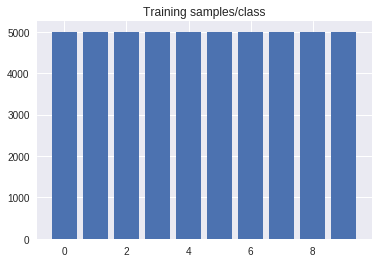

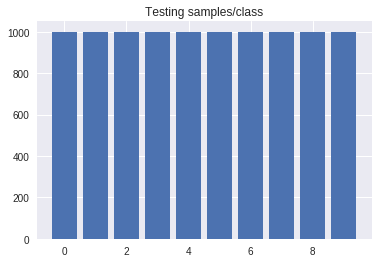

In [0]:
y_train = cls_train
y_test = cls_test

X_train = images_train
X_test = images_test

train_stats = get_stats(y_train)
test_stats = get_stats(y_test)

plt.figure()
plot_stats(train_stats, "Training samples/class")
plot_stats(test_stats, "Testing samples/class")

In [0]:
def plot_images(images, cls_true, cls_pred=None, smooth=True):

    assert len(images) == len(cls_true) == 9

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3)

    # Adjust vertical spacing if we need to print ensemble and best-net.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Interpolation type.
        if smooth:
            interpolation = 'spline16'
        else:
            interpolation = 'nearest'

        # Plot image.
        ax.imshow(images[i, :, :, :],
                  interpolation=interpolation)
            
        # Name of the true class.
        cls_true_name = class_names[cls_true[i]]

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true_name)
        else:
            # Name of the predicted class.
            cls_pred_name = class_names[cls_pred[i]]

            xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

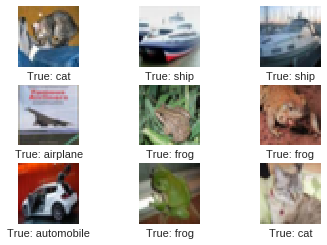

In [0]:
# Get the first images from the test-set.
images = images_test[0:9]

# Get the true classes for those images.
cls_true = cls_test[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true, smooth=False)

### Vizualizati dataset-ul cu sample-uri din fiecare clasa.

In [0]:
num_samples = 10

image_shape = images_train.shape[1:]

img_height, img_width = image_shape[0], image_shape[1]

print("hxw {}x{}".format(img_height, img_width))

def draw_samples(X, y, y_target, num_cl, colormap = None):
    c_ids = np.where(y == y_target)
    selected_idx = random.sample(c_ids[0].tolist(), num_samples)
    for i, idx in enumerate(selected_idx):
        plt.subplot(num_cl, num_samples, (num_samples * y_target) + i + 1)
        plt.axis('off')
        plt.imshow(X[idx], colormap)

hxw 32x32


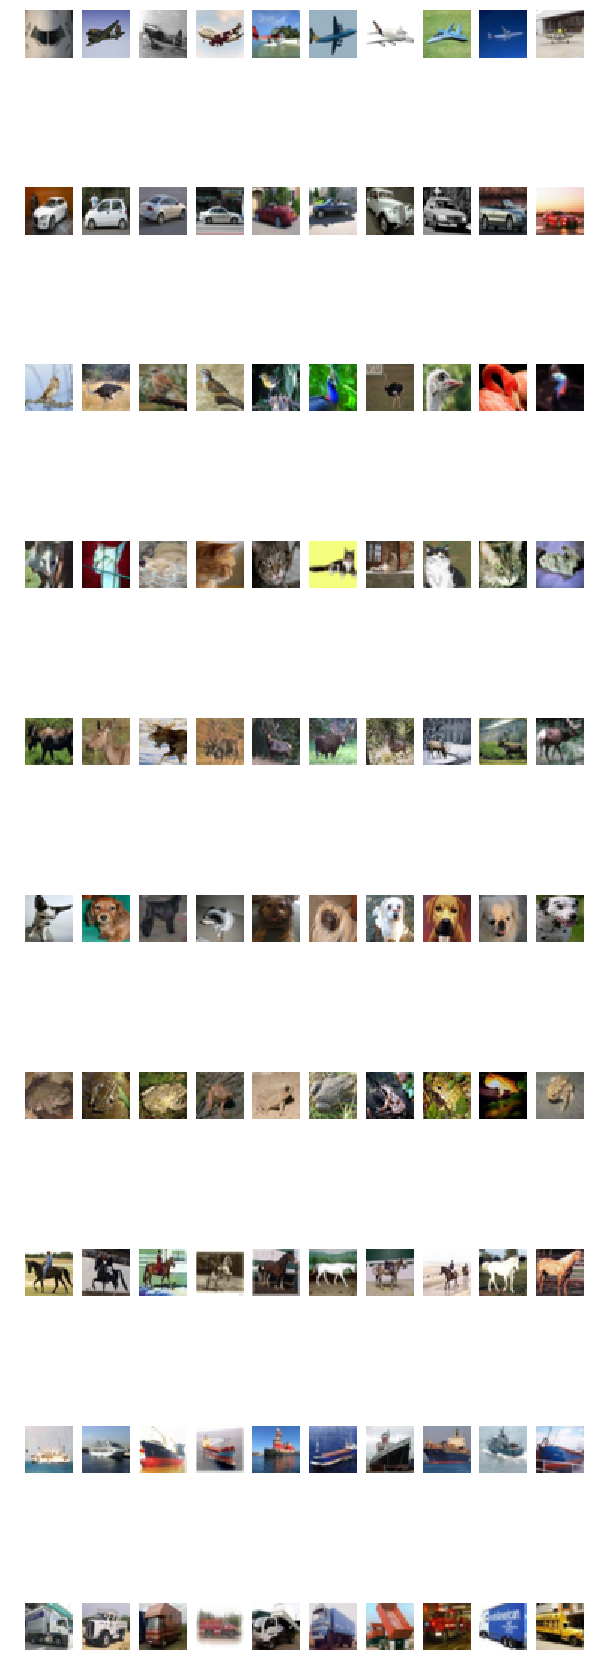

In [0]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# index = random.randint(0, len(X_train))
# image = X_train[index].squeeze()



plt.figure(figsize=(num_samples, img_width))
for c in range(n_classes):
    draw_samples(X_train, y_train, c, n_classes)
# 
# plt.imshow(image)
# plt.axis('off')
# print(y_train[index])

## Pasul 3. Definirea modelului in TensorFlow

### *Nota* Vom folosi tensoflow slim pentru a ne face viata mai usoara.

In [0]:
import tensorflow as tf

slim = tf.contrib.slim
trunc_normal = lambda stddev: tf.truncated_normal_initializer(stddev=stddev)


## Definirea unui argument scope. 

Un argument scope furnizeaza parametri default pentru operatiile din slim.
Pentru a consulta parametri default, ne putem uita direct in codul sursa:

https://github.com/tensorflow/tensorflow/blob/master/tensorflow/contrib/layers/python/layers/layers.py#L917

In [0]:
def cifarnet_arg_scope(weight_decay=0.004, is_training=True):
  """Defines the default cifarnet argument scope.

  Args:
    weight_decay: The weight decay to use for regularizing the model.

  Returns:
    An `arg_scope` to use for the cifarnet model.
  """
  with slim.arg_scope(
      [slim.conv2d],
      weights_initializer=tf.truncated_normal_initializer(stddev=5e-2),
      activation_fn=tf.nn.relu):
    with slim.arg_scope(
        [slim.fully_connected],
        biases_initializer=tf.constant_initializer(0.1),
        weights_initializer=trunc_normal(0.04),
        weights_regularizer=slim.l2_regularizer(weight_decay),
        normalizer_fn=None,
        activation_fn=tf.nn.relu) as sc:
      return sc


## Task 1. Adaugati normalizare pentru conv2d folosind batchn norm si argument scope.
Hints: 
* cautati argumentul care controleaza normalizarea in definitiea conv2d din slim https://github.com/tensorflow/tensorflow/blob/master/tensorflow/contrib/layers/python/layers/layers.py#L917
* vrem sa controlam rata de invatare si pentru batchnorm.

```
batch_norm_params = {
      'is_training': is_training,
      'center': True,
      'scale': True,
      'decay': 0.997,
      'epsilon': 0.001,
  }

```

In acest snippet de cod batch norm este configurat sa:
  * scada mean-ul
  * imparta la varianta
  * train/test e configurat prin variabila
  * momentum-ul este controlat de `decay`
  * impartirea cu 0 este previnita cu `epsilon`
  

* pentru a configura argumentele default pentr o operatie direct cu un dictionar puteti folosi apel de genul:
  `arg_scope(op_list, ** params)`

```
@tf_contextlib.contextmanager
def arg_scope(list_ops_or_scope, **kwargs):
  """Stores the default arguments for the given set of list_ops.
  For usage, please see examples at top of the file.
  Args:
    list_ops_or_scope: List or tuple of operations to set argument scope for or
      a dictionary containing the current scope. When list_ops_or_scope is a
      dict, kwargs must be empty. When list_ops_or_scope is a list or tuple,
      then every op in it need to be decorated with @add_arg_scope to work.
    **kwargs: keyword=value that will define the defaults for each op in
              list_ops. All the ops need to accept the given set of arguments.
  
```

https://github.com/tensorflow/tensorflow/blob/master/tensorflow/contrib/framework/python/ops/arg_scope.py#L112

 

In [0]:
def cifarnet_arg_scope_bnorm(weight_decay=0.004, is_training=True):
  """Defines the batch norm cifarnet argument scope.

  Args:
    weight_decay: The weight decay to use for regularizing the model.

  Returns:
       An `arg_scope` to use for the cifarnet model.
  """
  
  batch_norm_params = {
      'is_training': is_training,
      'center': True,
      'scale': True,
      'decay': 0.997,
      'epsilon': 0.001,
  }
  
  with slim.arg_scope(
      [slim.conv2d],
      # weights_initializer=tf.truncated_normal_initializer(stddev=5e-2),
      weights_initializer=tf.contrib.layers.xavier_initializer_conv2d(),
      activation_fn=tf.nn.relu6,
      normalizer_fn=slim.batch_norm):
    with slim.arg_scope([slim.batch_norm], **batch_norm_params):
      with slim.arg_scope(
          [slim.fully_connected],
          biases_initializer=tf.constant_initializer(0.1),
          # weights_initializer=trunc_normal(0.04),
          weights_initializer=tf.contrib.layers.xavier_initializer(),
          weights_regularizer=slim.l2_regularizer(weight_decay),

          activation_fn=tf.nn.relu) as sc:
         
          return sc


## CifarNet

In [0]:
def inception_module(net, maps, scope=None, reuse=None):
  conv_1x1_map = maps[0]   # număr feature maps branch 1
  reduce_3x3_map = maps[1] # număr feature maps reduction branch 2
  reduce_5x5_map = maps[2] # număr feature maps reduction branch 3
  conv_3x3_map = maps[3]   # număr feature maps branch 2
  conv_5x5_map = maps[4]   # număr feature maps branch 3
  conv_1x1_4_map = maps[5] # număr feature maps branch 4
  
  with tf.variable_scope(scope, 'InceptionBlock', [net], reuse=reuse):
    with tf.variable_scope('Branch_1'):
      conv_1x1_1 = slim.conv2d(net, conv_1x1_map, [1, 1],
                                padding='SAME', scope='conv_1x1_1')
    with tf.variable_scope('Branch_2'):
      conv_1x1_2 = slim.conv2d(net, reduce_3x3_map, [1, 1],
                                padding='SAME', scope='conv_1x1_2')
      conv_3x3 = slim.conv2d(conv_1x1_2, conv_3x3_map, [3, 3],
                            padding='SAME', scope='conv_3x3')
    with tf.variable_scope('Branch_3'):
      conv_1x1_3 = slim.conv2d(net, reduce_5x5_map, [1, 1],
                                padding='SAME', scope='conv_1x1_3')
      conv_5x5 = slim.conv2d(conv_1x1_3, conv_5x5_map, [5, 5],
                              padding='SAME', scope='conv_5x5')
    with tf.variable_scope('Branch_4'):
      maxpool = slim.max_pool2d(net, [3, 3],
                                  stride=1, padding='SAME', scope='maxpool')
      conv_1x1_4 = slim.conv2d(maxpool, conv_1x1_4_map, [1, 1],
                                padding='SAME', scope='conv_1x1_4')

    net = tf.concat([conv_1x1_1, conv_3x3, conv_5x5, conv_1x1_4],
                          axis=3, name='inception')
  
  return net

In [0]:
trunc_normal = lambda stddev: tf.truncated_normal_initializer(stddev=stddev)

def cifarnet_bn(images, num_classes=10, is_training=False,
             dropout_keep_prob=0.5,
             prediction_fn=slim.softmax,
             scope='CifarNet'):
 
  end_points = {}

  with tf.variable_scope(scope, 'CifarNet', [images]):
    # Stem Network 
    # Input: 3x28x28
    # Output: 96x28x28
    net = slim.conv2d(images, 32, [3, 3],
                     padding='SAME', scope='stem_conv1')
    net = slim.conv2d(net,96, [3, 3],
                     padding='SAME', scope='stem_conv2')
    
    # Inception Module 1
    # Input: 96x28x28
    # Output: 128x28x28
    net = inception_module(net, [32, 96, 16, 64, 16, 16])
    end_points['inception1'] = net
    
    # Inception Module 2
    # Input: 128x28x28
    # Output: 240x28x28
    net = inception_module(net, [64, 128, 32, 96, 48, 32])
    end_points['inception2'] = net
    
    # Maxpool
    # Input: 240x28x28
    # Output: 240x14x14
    net = slim.max_pool2d(net, [3, 3],
                             stride=2, padding='SAME', scope='maxpool')
    
    end_points['maxpool'] = net
    
    
    # Inception Module 3
    # Input: 240x14x14
    # Output: 256x14x14
    net = inception_module(net, [96, 96, 16, 104, 24, 32])
    end_points['inception3'] = net
    
    # Avgpool
    # Input: 256x14x14
    # Output: 256x4x4
    net = slim.avg_pool2d(net, [5, 5],
                             stride=3, padding='SAME', scope='avgpool')
    end_points['avgpool'] = net
    
    
    # Flatten:
    # Input: 256x4x4
    # Output: 4096
    net = slim.flatten(net)
    end_points['flatten'] = net

    net = slim.dropout(net, dropout_keep_prob, is_training=is_training,
                       scope='dropout1')
    
    # FC
    # Input: 4096
    # Output: 10
    logits = slim.fully_connected(net, num_classes,
                                  biases_initializer=tf.zeros_initializer(),
                                  # weights_initializer=trunc_normal(1/50.0),
                                  weights_initializer=tf.contrib.layers.xavier_initializer(),
                                  weights_regularizer=None,
                                  activation_fn=None,
                                  scope='logits')
    
    end_points['Logits'] = logits
    end_points['Predictions'] = prediction_fn(logits, scope='Predictions')

  return logits, end_points

In [0]:
# parametri de training si input
batch_size = 32
height = 32
width = 32
channels = 3
num_classes = 10
initial_learning_rate = 1e-4

### Adaugarea conexiunilor de intrare. tf.placeholders

In [0]:
    def add_preprocessing(image_input, is_training):
      
        def _process_image(augment_level, image):
            # Because these operations are not commutative, consider randomizing
            # randomize the order their operation.
            if augment_level > 0:
                image = tf.image.random_brightness(image, max_delta=30)
                image = tf.image.random_contrast(image, lower=0.75, upper=1.25)
            if augment_level > 1:
                image = tf.image.random_saturation(image, lower=0.5, upper=1.6)
                image = tf.image.random_hue(image, max_delta=0.15)
            image = tf.minimum(image, 255.0)
            image = tf.maximum(image, 0)
            return image

        def _preprocess_train(input_tensor):
            input_tensor = tf.image.random_flip_left_right(input_tensor)
#             input_tensor = input_tensor * 255.0
#             input_tensor = _process_image(1, input_tensor)
#             input_tensor = tf.scalar_mul(1.0 / 255, input_tensor)

            input_tensor = tf.subtract(input_tensor, 0.5)
            input_tensor = tf.multiply(input_tensor, 2.0)
            # input_tensor = tf.Print(input_tensor, [], "there")

            cropped_input_tensor = tf.random_crop(input_tensor, [28,28,3])
      
            return cropped_input_tensor
#             return input_tensor
          
        def _preprocess_test(input_tensor):
            # input_tensor = tf.scalar_mul(1.0 / 255, input_tensor)
            input_tensor = tf.subtract(input_tensor, 0.5)
            input_tensor = tf.multiply(input_tensor, 2.0)
            # input_tensor = tf.Print(input_tensor, [], "here")
            
#             cropped_input_tensor = tf.image.central_crop(input_tensor, 0.875)
            
  
            cropped_input_tensor = input_tensor[2:30,2:30,:]
            return cropped_input_tensor
#             return input_tensor
          
        preprocessed_input = tf.map_fn(lambda img:
                                 tf.cond(
                                   tf.equal(
                                        is_training,
                                     tf.constant(True)),
                                    lambda: _preprocess_train(img),
                                    lambda: _preprocess_test(img)), image_input)

        return preprocessed_input
          
        
    def add_placeholders():
        
        # image batch input
        image_input = tf.placeholder(
            tf.float32, [None, height, width, 3],
            name='image_input'
        )

        label_input = tf.placeholder(
            tf.int64, [None],
            name='label_input'
        )
        
        is_training = tf.placeholder(tf.bool, name='is_training')
        
        learning_rate = tf.placeholder(tf.float32, shape=[])
        
        return image_input, label_input, is_training, learning_rate


### Nota
Pentru augmentare adaugati o operatie tensorflow in input:

```

if is_training:
    scaled_input_tensor = tf.scalar_mul((1.0 / 255), _process_image(1, image_input))
else:
    scaled_input_tensor = tf.scalar_mul((1.0 / 255), self.image_input)

scaled_input_tensor = tf.subtract(scaled_input_tensor, 0.5)
self.scaled_input_tensor = tf.multiply(scaled_input_tensor, 2.0)

```

Mai sus se opereaza folosind `_process_image` augmenatere de brgithnes si saturation.
Inainte, input-ul este normalizat.

Normalizarea se efectueaza atat la training cat si la testing.
Augmentarea se efectueaza doar la testing si are rol in generelizare.

Puteti folosi si horizontal flipping `tf.image.random_flip_left_right`

https://www.tensorflow.org/api_docs/python/tf/image/random_flip_left_right


In [0]:
images_train.shape

(50000, 32, 32, 3)

In [0]:
labels_train.shape

(50000, 10)

In [0]:
np.unique(cls_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Functie helper pentru a incarca un minibatch random la training

In [0]:
def random_batch(img, labels, bsize=32):
    # Number of images in the training-set.
    num_images = len(img)
    #     print(num_images)

    # Create a random index.
    idx = np.random.choice(num_images,
                           size=bsize,
                           replace=False)

    # Use the random index to select random images and labels.
    x_batch = img[idx, :, :, :]
    y_batch = labels[idx]

    return x_batch, y_batch

In [0]:
x, y = random_batch(X_train, y_train)

y.shape

(32,)

### Functie helper pentru obtinirea unui batch la test. Nu facem shuffle la test

In [0]:
def get_batch(imgs, labels, step, bsize=32):
  offset = (step * batch_size) % (labels.shape[0] - batch_size)
#   print(offset)
  batch_imgs = imgs[offset:(offset + bsize), :, :, :]
  batch_labels = labels[offset:(offset + bsize)]
  
  return batch_imgs, batch_labels
  
batch_imgs, batch_labels = get_batch(images_test, cls_test, 2)
  
print(batch_imgs.shape)
print(batch_labels.shape)
  

(32, 32, 32, 3)
(32,)


### Functie pentru evaluare acuratete

In [0]:
#evaluate model


def evaluate():
  bsize = 32
  total_examples = cls_test.shape[0]  
  iters = int(total_examples/bsize)
#   print("Total examples {}".format(total_examples))
#   print("Total iters {}".format(iters))
  
  
  acc = []
  losses = []
    
  for i in range(iters):
    
    x, y = get_batch(images_test, cls_test, i, bsize)

    feed_dict = {

        image_input: x,
        label_input: y,
        is_training: False

    }

    testAcc, testLoss = sess.run([accuracy, loss], feed_dict=feed_dict)
    acc.append(testAcc)
    losses.append(testLoss)
    #if i % 100 == 0:
    #  print("Test " + str(i) + ": accuracy:" + str(testAcc) + " loss: " + str(testLoss))
    
      
#   print(acc)
  meanAcc = np.mean(np.asarray(acc))
  meanLoss = np.mean(np.asarray(losses))
  
#   print("Test Accuracy {:.2f} %".format(meanAcc * 100))
  
  return meanAcc, meanLoss
  
  
#evaluate()               


In [0]:
trainingAccuracyList = []
trainingLossList = []
testAccuracyList = []
testLossList = []
learningRateList = []

In [0]:
tf.reset_default_graph()

g = tf.Graph().as_default()
image_input, label_input, is_training, learning_rate = add_placeholders()
preprocessed_image_input = add_preprocessing(image_input, is_training)


arg_scope = cifarnet_arg_scope_bnorm(is_training=is_training)
with slim.arg_scope(arg_scope):
  logits, end_points = cifarnet_bn(preprocessed_image_input, is_training=is_training)

# scope = vgg.vgg_arg_scope()
# with slim.arg_scope(scope):
#    logits, end_points = vgg.vgg_16(image_input, num_classes=10, is_training=is_training)



### Definirea pasilor de antrenare

In [0]:
initial_learning_rate = 1e-3
num_steps = int(50000)
num_examples = images_train.shape[0]
iters = num_examples / batch_size
learning_rate_step = 10000
learning_rate_decay = 0.5



loss = tf.reduce_mean(
  tf.nn.sparse_softmax_cross_entropy_with_logits(labels=label_input, logits=logits))

# accuracy of the trained model, between 0 (worst) and 1 (best)
predictions = end_points['Predictions']

correct_prediction = tf.equal(tf.argmax(predictions, 1), label_input)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))





# Optimizer.
# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# for batch norm training. Note: we should use slim.train_op

update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
  # Ensures that we execute the update_ops before performing the train_step
#   optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)
  optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
  
  
  
  
init = tf.global_variables_initializer()
#init =  tf.initialize_all_variables()


sess = tf.Session()
# actually initialize our variables
sess.run(init)


  
running_lr = initial_learning_rate

print("Starting optimization")
print("Batch size {}".format(batch_size))
print("Initial LR {}. LR stepdown itnerval {}. LR deacy factor {}".format(running_lr, learning_rate_step, learning_rate_decay))

for i in range(num_steps):
  x, y = random_batch(X_train, y_train, bsize=batch_size)

  feed_dict = {

      image_input: x,
      label_input: y,
      is_training: True,
      learning_rate : running_lr

  }

  if i % 200 == 0:
      _, trainAcc, trainLoss = sess.run([optimizer, accuracy, loss], feed_dict=feed_dict)
      
      testAcc, testLoss = evaluate()
      
      print("Train " + str(i) + ": accuracy:" + str(trainAcc) + " loss: " + str(trainLoss))
      print("Test " + str(i) + ": accuracy:" + str(testAcc) + " loss: " + str(testLoss))
      
      trainingAccuracyList.append(trainAcc)
      trainingLossList.append(trainLoss)
      testAccuracyList.append(testAcc)
      testLossList.append(testLoss)
      learningRateList.append(running_lr)
     
  else:
      sess.run([optimizer], feed_dict=feed_dict)
  
  
  if  i > 0 and i % learning_rate_step == 0:
      print("Learning reate step down. Old {}. New {}".format(running_lr, running_lr * learning_rate_decay))
      running_lr = running_lr * learning_rate_decay
      
          
    




      

Starting optimization
Batch size 32
Initial LR 0.001. LR stepdown itnerval 10000. LR deacy factor 0.5
Train 0: accuracy:0.125 loss: 2.762466
Test 0: accuracy:0.10867388 loss: 2.3002465
Train 200: accuracy:0.375 loss: 1.7612132
Test 200: accuracy:0.12339743 loss: 2.809264
Train 400: accuracy:0.40625 loss: 1.636409
Test 400: accuracy:0.14393029 loss: 2.6921175
Train 600: accuracy:0.59375 loss: 1.0205787
Test 600: accuracy:0.21864983 loss: 2.598739
Train 800: accuracy:0.5 loss: 1.1910796
Test 800: accuracy:0.3656851 loss: 1.9834362
Train 1000: accuracy:0.6875 loss: 1.0064012
Test 1000: accuracy:0.44060495 loss: 1.5788485
Train 1200: accuracy:0.59375 loss: 1.3309392
Test 1200: accuracy:0.5036058 loss: 1.4361581
Train 1400: accuracy:0.71875 loss: 0.84884614
Test 1400: accuracy:0.5724159 loss: 1.2881582
Train 1600: accuracy:0.65625 loss: 0.8084879
Test 1600: accuracy:0.61949116 loss: 1.1154994
Train 1800: accuracy:0.625 loss: 1.2221138
Test 1800: accuracy:0.58403444 loss: 1.2715741
Train 200

Train 9000: accuracy:0.90625 loss: 0.38651264
Test 9000: accuracy:0.78715944 loss: 0.64386475
Train 9200: accuracy:0.875 loss: 0.3356004
Test 9200: accuracy:0.80378604 loss: 0.57508343
Train 9400: accuracy:0.9375 loss: 0.27824995
Test 9400: accuracy:0.7615184 loss: 0.7002594
Train 9600: accuracy:0.78125 loss: 0.67072785
Test 9600: accuracy:0.7942708 loss: 0.59503585
Train 9800: accuracy:0.875 loss: 0.44600764
Test 9800: accuracy:0.7952724 loss: 0.6281164
Train 10000: accuracy:0.71875 loss: 0.5861523
Test 10000: accuracy:0.7870593 loss: 0.6447803
Learning reate step down. Old 0.001. New 0.0005
Train 10200: accuracy:0.75 loss: 0.5168099
Test 10200: accuracy:0.80488783 loss: 0.5746349
Train 10400: accuracy:0.9375 loss: 0.26616085
Test 10400: accuracy:0.82832533 loss: 0.50697863
Train 10600: accuracy:0.8125 loss: 0.5031163
Test 10600: accuracy:0.8182091 loss: 0.5273489
Train 10800: accuracy:0.75 loss: 0.7857894
Test 10800: accuracy:0.8274239 loss: 0.4977324
Train 11000: accuracy:0.8125 los

Train 18000: accuracy:0.84375 loss: 0.41628587
Test 18000: accuracy:0.84965944 loss: 0.44721732
Train 18200: accuracy:0.90625 loss: 0.31480587
Test 18200: accuracy:0.82732373 loss: 0.5216434
Train 18400: accuracy:0.84375 loss: 0.2534514
Test 18400: accuracy:0.838141 loss: 0.5022689
Train 18600: accuracy:0.90625 loss: 0.2588735
Test 18600: accuracy:0.838141 loss: 0.5133081
Train 18800: accuracy:0.90625 loss: 0.20182523
Test 18800: accuracy:0.8203125 loss: 0.5520468
Train 19000: accuracy:0.875 loss: 0.37280828
Test 19000: accuracy:0.8354367 loss: 0.48343888
Train 19200: accuracy:0.8125 loss: 0.46396804
Test 19200: accuracy:0.85647035 loss: 0.42662498
Train 19400: accuracy:0.875 loss: 0.34047908
Test 19400: accuracy:0.86067706 loss: 0.42925936
Train 19600: accuracy:0.8125 loss: 0.32670712
Test 19600: accuracy:0.85436696 loss: 0.43504822
Train 19800: accuracy:0.84375 loss: 0.51909244
Test 19800: accuracy:0.86638623 loss: 0.41542992
Train 20000: accuracy:0.84375 loss: 0.26730514
Test 20000:

Train 27000: accuracy:0.90625 loss: 0.12561563
Test 27000: accuracy:0.8742989 loss: 0.38995162
Train 27200: accuracy:0.9375 loss: 0.17305544
Test 27200: accuracy:0.8464543 loss: 0.4862616
Train 27400: accuracy:0.8125 loss: 0.50949305
Test 27400: accuracy:0.87469953 loss: 0.38152832
Train 27600: accuracy:0.90625 loss: 0.19006348
Test 27600: accuracy:0.8709936 loss: 0.39659098
Train 27800: accuracy:0.96875 loss: 0.11584635
Test 27800: accuracy:0.8525641 loss: 0.46227068
Train 28000: accuracy:0.90625 loss: 0.3990538
Test 28000: accuracy:0.87590146 loss: 0.39351937
Train 28200: accuracy:0.75 loss: 0.56851697
Test 28200: accuracy:0.86428285 loss: 0.4303174
Train 28400: accuracy:0.96875 loss: 0.10189591
Test 28400: accuracy:0.8701923 loss: 0.4032805
Train 28600: accuracy:0.96875 loss: 0.13984905
Test 28600: accuracy:0.8697917 loss: 0.3994798
Train 28800: accuracy:0.90625 loss: 0.21462233
Test 28800: accuracy:0.8757011 loss: 0.38330132
Train 29000: accuracy:0.96875 loss: 0.13587049
Test 29000

Train 36000: accuracy:0.96875 loss: 0.10397873
Test 36000: accuracy:0.87690306 loss: 0.39367342
Train 36200: accuracy:0.90625 loss: 0.13940233
Test 36200: accuracy:0.88421476 loss: 0.3695581
Train 36400: accuracy:0.96875 loss: 0.084945336
Test 36400: accuracy:0.8848157 loss: 0.37250435
Train 36600: accuracy:1.0 loss: 0.040591296
Test 36600: accuracy:0.8801082 loss: 0.38409445
Train 36800: accuracy:0.96875 loss: 0.14870276
Test 36800: accuracy:0.8858173 loss: 0.36139014
Train 37000: accuracy:0.9375 loss: 0.1366418
Test 37000: accuracy:0.888121 loss: 0.35490635
Train 37200: accuracy:0.875 loss: 0.34672326
Test 37200: accuracy:0.88321316 loss: 0.3802716
Train 37400: accuracy:0.90625 loss: 0.18182006
Test 37400: accuracy:0.8858173 loss: 0.36573458
Train 37600: accuracy:0.96875 loss: 0.13248962
Test 37600: accuracy:0.8782051 loss: 0.39795586
Train 37800: accuracy:0.96875 loss: 0.09728818
Test 37800: accuracy:0.8871194 loss: 0.36192745
Train 38000: accuracy:0.96875 loss: 0.088917136
Test 380

Train 45000: accuracy:0.9375 loss: 0.14678591
Test 45000: accuracy:0.8894231 loss: 0.35375085
Train 45200: accuracy:0.90625 loss: 0.2994273
Test 45200: accuracy:0.8880208 loss: 0.35470805
Train 45400: accuracy:0.96875 loss: 0.09797228
Test 45400: accuracy:0.8866186 loss: 0.36841673
Train 45600: accuracy:1.0 loss: 0.020850666
Test 45600: accuracy:0.88982373 loss: 0.35215437
Train 45800: accuracy:0.96875 loss: 0.1063671
Test 45800: accuracy:0.88872194 loss: 0.35636955
Train 46000: accuracy:0.90625 loss: 0.19784206
Test 46000: accuracy:0.88752 loss: 0.35515916
Train 46200: accuracy:0.96875 loss: 0.23037124
Test 46200: accuracy:0.88772035 loss: 0.35885358
Train 46400: accuracy:0.96875 loss: 0.12758785
Test 46400: accuracy:0.8879207 loss: 0.35971165
Train 46600: accuracy:1.0 loss: 0.07594821
Test 46600: accuracy:0.8885216 loss: 0.3603459
Train 46800: accuracy:0.90625 loss: 0.12829709
Test 46800: accuracy:0.8895232 loss: 0.35544372
Train 47000: accuracy:0.875 loss: 0.2317479
Test 47000: accu

### Plotting

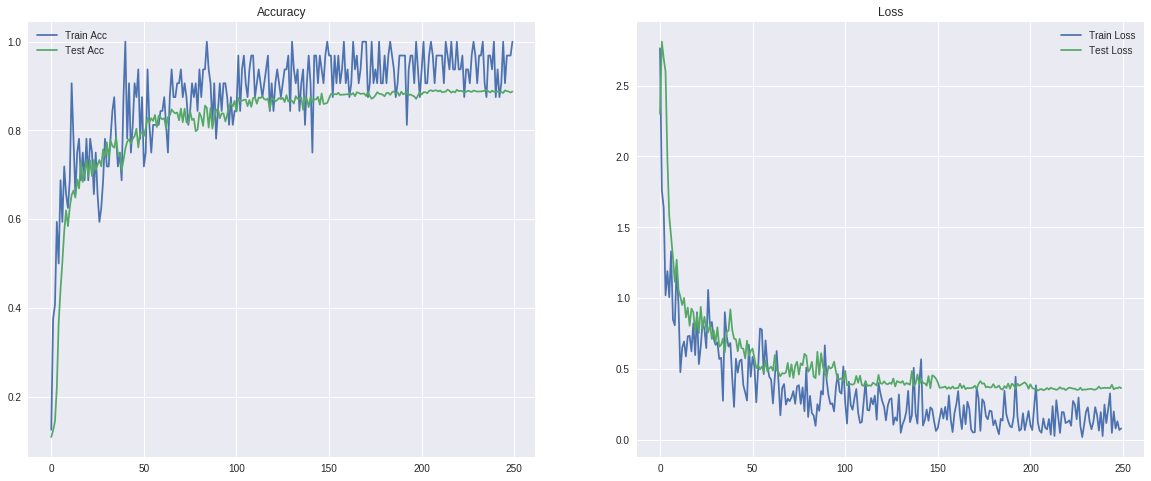

In [0]:
plt.figure(figsize=(20,8))

# Plot Accuracy
plt.subplot(1,2,1);
plt.plot(trainingAccuracyList, label="Train Acc");
plt.plot(testAccuracyList, label="Test Acc");
plt.title("Accuracy");
plt.legend();

# Plot Loss
plt.subplot(1,2,2);
plt.plot(trainingLossList, label="Train Loss");
plt.plot(testLossList, label="Test Loss");
plt.title("Loss");
plt.legend();

## Evaluate final model

In [0]:

  
acc, test_loss = evaluate()

print("Test accuracy:" + str(acc) + " loss: " + str(test_loss))
                   

Test accuracy:0.8885216 loss: 0.36998808


### Nota

* Fara batch norm: accuracy 73 %
* Cu batch norm: accuracy ~ 78 %

## Save a model checkpoint. Restoring a model checkpoint

In [0]:
# Save / restore model

#!mkdir ckpts

vars_to_save = tf.global_variables()
saver = tf.train.Saver(var_list=vars_to_save)


model_name ='./ckpts/cifarnet-batchnorm.ckpt'
saver.save(sess, model_name, global_step=num_steps)
print(vars_to_save)

[<tf.Variable 'CifarNet/conv1/weights:0' shape=(5, 5, 3, 64) dtype=float32_ref>, <tf.Variable 'CifarNet/conv1/BatchNorm/gamma:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'CifarNet/conv1/BatchNorm/beta:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'CifarNet/conv1/BatchNorm/moving_mean:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'CifarNet/conv1/BatchNorm/moving_variance:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'CifarNet/conv2/weights:0' shape=(5, 5, 64, 64) dtype=float32_ref>, <tf.Variable 'CifarNet/conv2/BatchNorm/gamma:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'CifarNet/conv2/BatchNorm/beta:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'CifarNet/conv2/BatchNorm/moving_mean:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'CifarNet/conv2/BatchNorm/moving_variance:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'CifarNet/fc3/weights:0' shape=(4096, 384) dtype=float32_ref>, <tf.Variable 'CifarNet/fc3/biases:0' shape=(384,) dtype=float32_ref>, <tf.Variable 'CifarNet

## Exmplu calcul acuratete folosint tf.metrics

`tf.metrics.accuracy` 

```
labels = ...
predictions = ...
accuracy, update_op_acc = tf.metrics.accuracy(
    labels, predictions)
error, update_op_error = tf.metrics.mean_absolute_error(
    labels, predictions)

sess.run(tf.local_variables_initializer())
for batch in range(num_batches):
  sess.run([update_op_acc, update_op_error])

accuracy, mean_absolute_error = sess.run([accuracy, mean_absolute_error])

```

https://www.tensorflow.org/api_docs/python/tf/metrics


## Testing model restore works

In [0]:
# test restore works
evaluate()
sess.run(init)
evaluate()
vars_to_restore = tf.global_variables()
saver = tf.train.Saver(var_list=vars_to_restore)
model_to_restore = "{}-{}".format(model_name, num_steps)
saver.restore(sess, model_to_restore)
evaluate()

INFO:tensorflow:Restoring parameters from ./ckpts/cifarnet-batchnorm.ckpt-50000


(0.78625804, 0.66461086)

In [0]:
#!ls ./ckpts

### One hot encoding

In [0]:
x, y = get_batch(images_test, cls_test, i)

y = y[:4]
print(y)
print(num_classes)

res = tf.one_hot(indices=y, depth=num_classes)
print(sess.run(res))

[3 3 3 8]
10
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


### Masurarea performantelor retelei folosind tf.metrics

In [0]:
# Remember

# predictions = end_points['Predictions']
# correct_prediction = tf.equal(tf.argmax(predictions, 1), label_input)
# accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# adaugam on nod pentru one hot

labels = tf.one_hot(indices=label_input, depth=num_classes)
# accuracy_streamed, update_op_acc = tf.contrib.metrics.streaming_accuracy(label_input, tf.argmax(predictions, 1))

accuracy_streamed, update_op_acc = tf.metrics.accuracy(label_input, tf.argmax(predictions, 1))

# init = tf.global_variables_initializer()
sess.run(tf.local_variables_initializer())
  

vars_to_restore = tf.global_variables()
saver = tf.train.Saver(var_list=vars_to_restore)
saver.restore(sess, model_to_restore)

evaluate()


INFO:tensorflow:Restoring parameters from ./ckpts/cifarnet-batchnorm.ckpt-50000


(0.78625804, 0.66461086)

In [0]:



def evaluate_streaming():
  total_examples = cls_test.shape[0]
  num_batches = int(total_examples / batch_size)
  print("Total examples {}".format(total_examples))
  print("Total iters {}".format(num_batches))
  
  for i in range(num_batches):
    
    x, y = get_batch(images_test, cls_test, i)

    feed_dict = {

        image_input: x,
        label_input: y,
        is_training: False

    }

    #testAcc, testLoss = sess.run([accuracy, loss], feed_dict=feed_dict)
    
    if i % 10 == 0:
      _, test_acc = sess.run([update_op_acc, accuracy_streamed],  feed_dict=feed_dict)
      print("Test " + str(i) + ": accuracy:" + str(test_acc))
    
    else:
      sess.run([update_op_acc], feed_dict=feed_dict)
    
      
  test_acc = sess.run(accuracy_streamed)
  print("Mean Accuracy  {:.2f} %".format(test_acc * 100))
  
  
evaluate_streaming()

Total examples 10000
Total iters 312
Test 0: accuracy:0.0
Test 10: accuracy:0.803125
Test 20: accuracy:0.7984375
Test 30: accuracy:0.7875
Test 40: accuracy:0.7875
Test 50: accuracy:0.790625
Test 60: accuracy:0.79010415
Test 70: accuracy:0.78080356
Test 80: accuracy:0.7792969
Test 90: accuracy:0.77916664
Test 100: accuracy:0.7821875
Test 110: accuracy:0.7818182
Test 120: accuracy:0.7841146
Test 130: accuracy:0.7858173
Test 140: accuracy:0.7892857
Test 150: accuracy:0.78833336
Test 160: accuracy:0.79003906
Test 170: accuracy:0.78878677
Test 180: accuracy:0.7899306
Test 190: accuracy:0.7878289
Test 200: accuracy:0.7871875
Test 210: accuracy:0.78720236
Test 220: accuracy:0.78451705
Test 230: accuracy:0.7849185
Test 240: accuracy:0.7846354
Test 250: accuracy:0.78475
Test 260: accuracy:0.78497595
Test 270: accuracy:0.7847222
Test 280: accuracy:0.78459823
Test 290: accuracy:0.7851293
Test 300: accuracy:0.7860417
Test 310: accuracy:0.78629035
Mean Accuracy  78.63 %


## Task (pentru acasa). Masurati acuratetea modelului pe clasa

## Variabile locale vs Variabile globale

In [0]:
tf.local_variables()

In [0]:
tf.global_variables()

In [0]:
!ls ckpts

# Vizualizarea Activarilor din retea

In [0]:
# visualize endpoints
end_points


{'Flatten': <tf.Tensor 'CifarNet/Flatten/flatten/Reshape:0' shape=(32, 4096) dtype=float32>,
 'Logits': <tf.Tensor 'CifarNet/logits/BiasAdd:0' shape=(32, 10) dtype=float32>,
 'Predictions': <tf.Tensor 'CifarNet/Predictions/Reshape_1:0' shape=(32, 10) dtype=float32>,
 'conv1': <tf.Tensor 'CifarNet/conv1/Relu6:0' shape=(32, 32, 32, 64) dtype=float32>,
 'conv2': <tf.Tensor 'CifarNet/conv2/Relu6:0' shape=(32, 16, 16, 64) dtype=float32>,
 'fc3': <tf.Tensor 'CifarNet/fc3/Relu:0' shape=(32, 384) dtype=float32>,
 'fc4': <tf.Tensor 'CifarNet/fc4/Relu:0' shape=(32, 192) dtype=float32>,
 'pool1': <tf.Tensor 'CifarNet/pool1/MaxPool:0' shape=(32, 16, 16, 64) dtype=float32>,
 'pool2': <tf.Tensor 'CifarNet/pool2/MaxPool:0' shape=(32, 8, 8, 64) dtype=float32>}

In [0]:
def plotActivations(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        ax = plt.gca()
        ax.grid(False)
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")

In [0]:
conv1 = end_points['conv1']

x, y = random_batch(X_train, y_train)

feed_dict = {

      image_input: x,
      label_input: y,
      is_training: False

  }

conv1_fmaps = sess.run(conv1, feed_dict=feed_dict)
conv1_fmaps.shape
activ1 = conv1_fmaps[0, :, :, :]




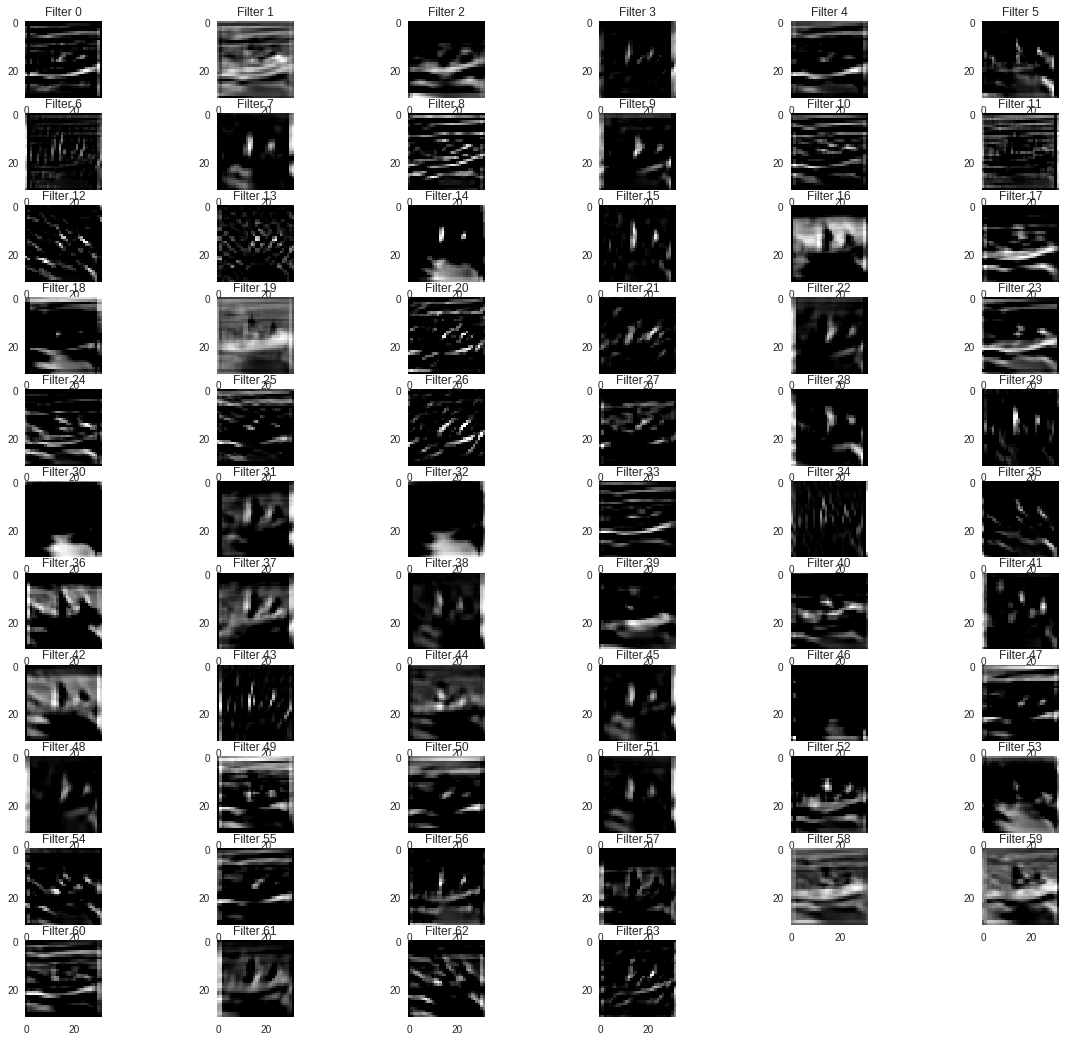

In [0]:
plotActivations(conv1_fmaps)

## Next Steps

1. Implementați modulul inception din Fig. 1 în cadrul metodei `inception_module`.

2. Implementați arhitectura din Fig.2 în cadrul metodei `cifarnet_bn`. (** Atenție la dimensiunea inputului rețelei ** )
  * Ar trebui să obțineți 88% accuracy

### Bonus

1. Combinați arhitectura de mai sus (Inception) cu conexiunile reziduale (ResNet)
  * Hint: [Inception-v4, Inception-ResNet and the Impact of Residual Connections on Learning](https://arxiv.org/pdf/1602.07261.pdf)